In [266]:
%matplotlib inline
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(16, 4))
plt.rc('font', size=16)
plt.rc('lines', linewidth=3)

In [267]:
a = np.load('data/all.npz')
sep = np.load('data/separate.npz')
com = np.load('data/combined.npz')
val_r = sep['val_r']
val_s = sep['val_s']
all_s = a['s']
all_r = a['r']

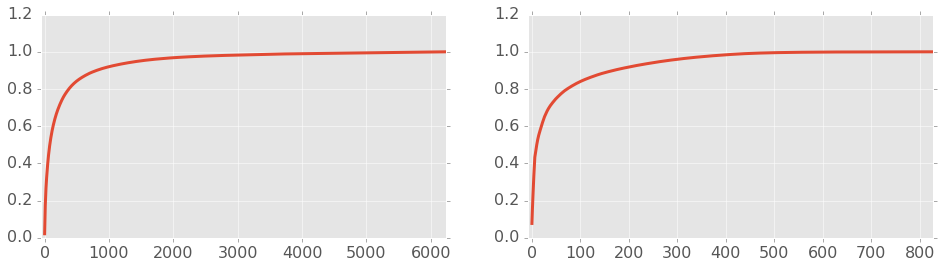

In [268]:
plt.subplot(121)
cs = np.sort(np.bincount(all_s))[::-1]
_=plt.plot(np.cumsum(cs)/float(np.sum(cs)), '-')
_=plt.axis([-all_s.max()/100, all_s.max(), 0, 1.2])

plt.subplot(122)
cr = np.sort(np.bincount(all_r))[::-1]
_=plt.plot(np.cumsum(cr)/float(np.sum(cr)), '-')
_=plt.axis([-all_r.max()/100, all_r.max(), 0, 1.2])

plt.savefig('sr.png', bbox_inches='tight', pad_inches=0)

In [82]:
print "Receiver:"
print f1_score(val_r, sep['pred_r'], average='micro')
print f1_score(val_r, sep['pred_r'], average='macro')
print f1_score(val_r, sep['pred_r'], average='weighted')
print "Sender:"
print f1_score(val_s, sep['pred_s'], average='micro')
print f1_score(val_s, sep['pred_s'], average='macro')
print f1_score(val_s, sep['pred_s'], average='weighted')

Receiver:
0.754746835443
0.392073177436
0.780996032836
Sender:
0.951884349827
0.80119702228
0.951909061938


In [269]:
print "Receiver:"
print f1_score(val_r, com['pred_r'], average='micro')
print f1_score(val_r, com['pred_r'], average='macro')
print f1_score(val_r, com['pred_r'], average='weighted')
print "Sender:"
print f1_score(val_s, com['pred_s'], average='micro')
print f1_score(val_s, com['pred_s'], average='macro')
print f1_score(val_s, com['pred_s'], average='weighted')

Receiver:
0.891542002301
0.576672697106
0.887868130438
Sender:
0.951165132336
0.797490324232
0.950544315575


In [106]:
def plot(actual, predicted, title):
    (p,r,f,s) = precision_recall_fscore_support(actual, predicted)

    plt.subplot(131)
    plt.plot(s,p,'.')
    plt.title('precision')
    plt.subplot(132)
    plt.plot(s,r,'.')
    plt.title(title+'\nrecall')
    plt.subplot(133)
    plt.plot(s,f,'.')
    plt.title('f1')
    plt.show()

    plt.subplot(131)
    _=plt.hist(p, bins=20)
    plt.subplot(132)
    _=plt.hist(r, bins=20)
    plt.subplot(133)
    _=plt.hist(f, bins=20)
    plt.show()

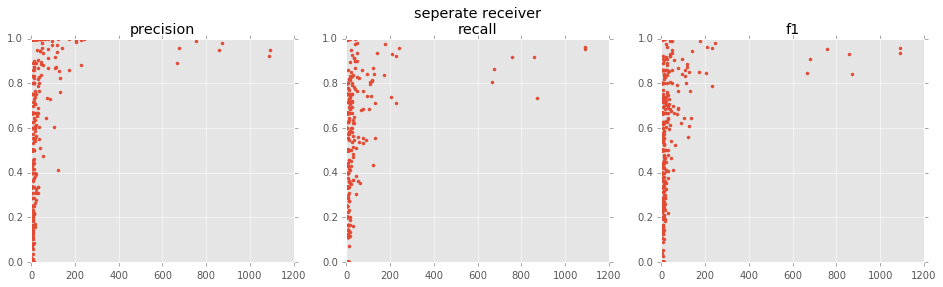

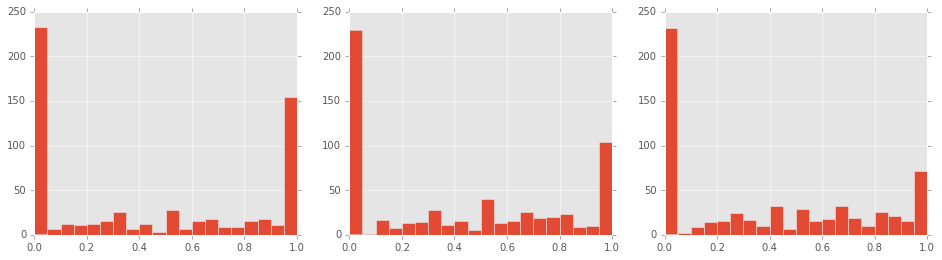

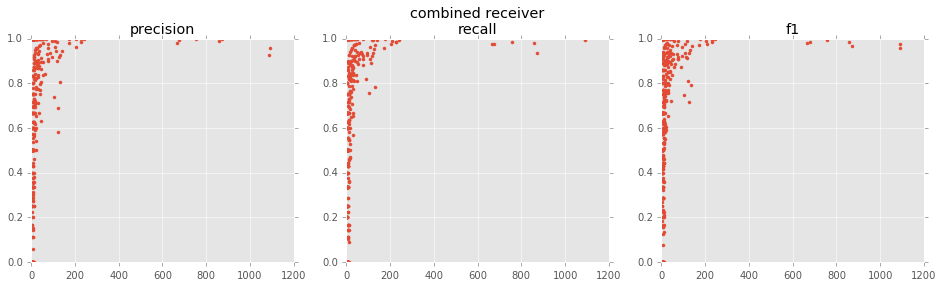

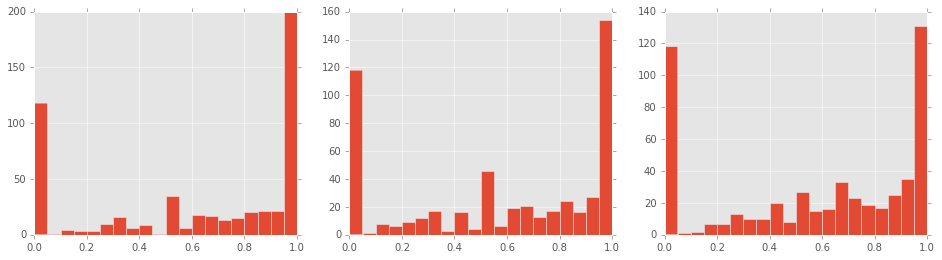

In [107]:
plot(val_r, sep['pred_r'], 'seperate receiver')
plot(val_r, com['pred_r'], 'combined receiver')

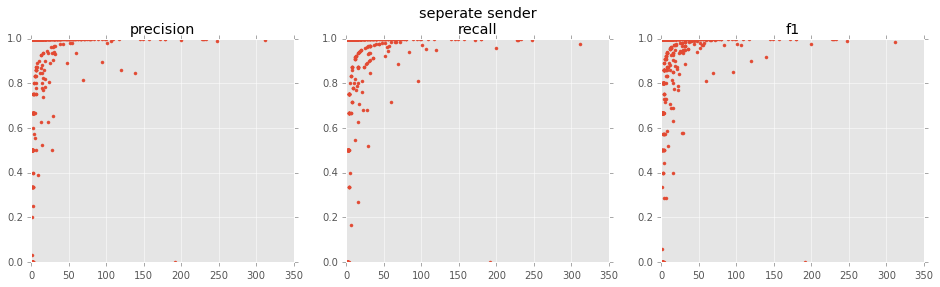

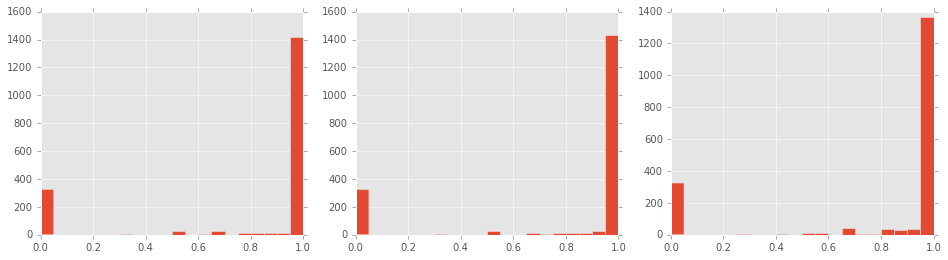

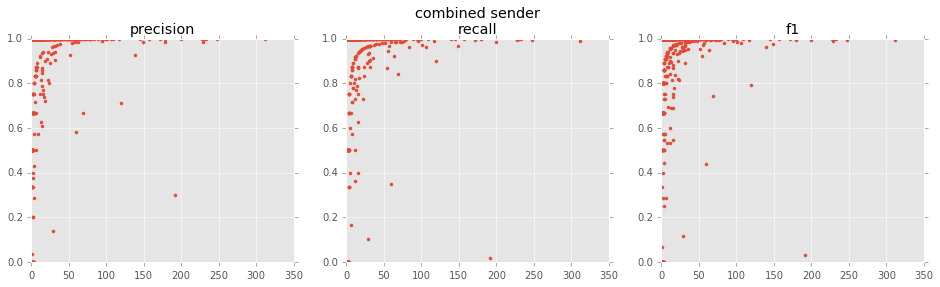

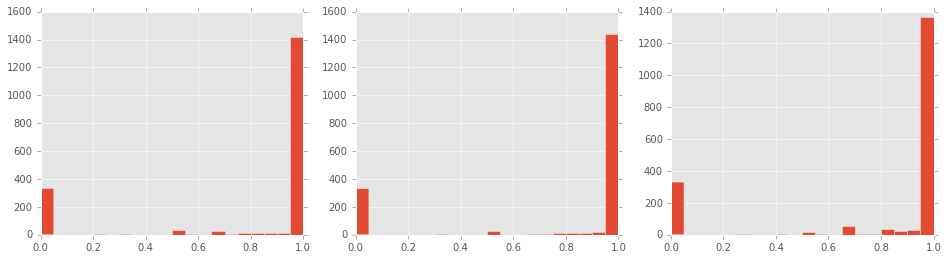

In [108]:
plot(val_s, sep['pred_s'], 'seperate sender')
plot(val_s, com['pred_s'], 'combined sender')

(839, 1803)
(755, 1803)
(84, 1803)
(48, 1803)
0.95761589404
0.22619047619
0.25


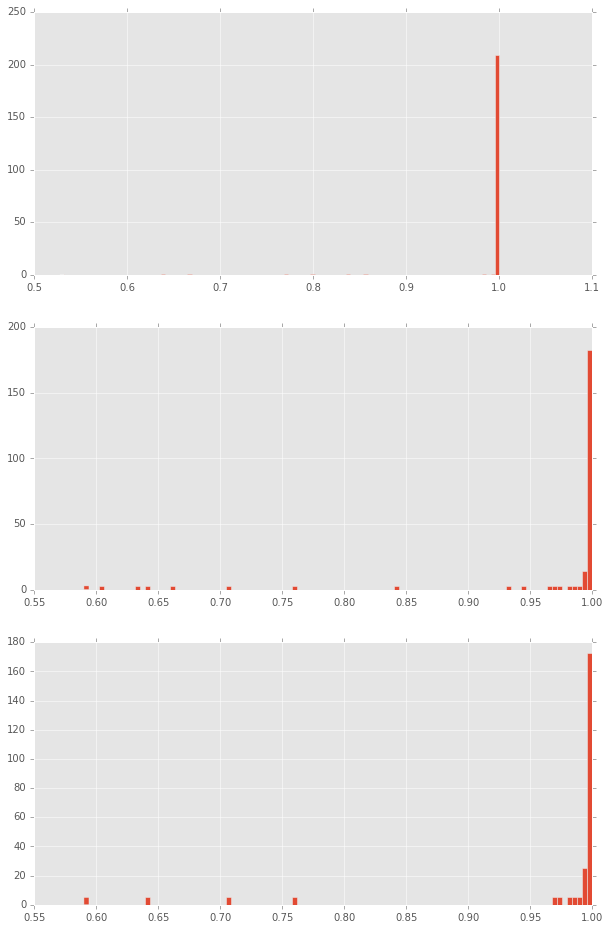

In [25]:
eq = (val_s==pred_s)
neq = (val_s!=pred_s)
nse = val_s==0
print prob.shape
print prob[eq].shape
print prob[neq].shape
print prob[nse].shape
plt.subplot(3,1,1)
_=plt.hist(prob[eq].max(axis=1), bins=100, normed=True)
print (prob[eq].max(axis=1)==1).mean()
plt.subplot(3,1,2)
_=plt.hist(prob[neq].max(axis=1), bins=100, normed=True)
print (prob[neq].max(axis=1)==1).mean()
plt.subplot(3,1,3)
_=plt.hist(prob[nse].max(axis=1), bins=100, normed=True)
print (prob[nse].max(axis=1)==1).mean()